In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [2]:
# haetaan elisan pörssidataa taanilan sivulta. 
# huom data pilkkuina koskas suomi
# huom jätetään eka rivi pois

elisa=pd.read_csv('http://taanila.fi/elisa.csv', sep=';', 
                  decimal=',', skiprows=1)
telia=pd.read_csv('http://taanila.fi/telia.csv', sep=';', 
                  decimal=',', skiprows=1)
elisa.head()

,Date,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,Trades,Unnamed: 11
0,2019-11-26,49.07,49.12,48.50,49.37,48.45,49.37,49.227,756028,37214680.12,2897,NaN
1,2019-11-25,48.52,48.55,48.13,48.82,47.96,48.54,48.516,258053,12519552.49,2301,NaN
2,2019-11-22,48.01,48.06,49.29,49.32,47.91,48.18,48.401,365713,17701310.91,3241,NaN
3,2019-11-21,49.51,49.55,49.10,49.56,49.09,49.51,49.408,306046,15121026.27,2250,NaN
4,2019-11-20,49.33,49.37,48.86,49.91,48.86,49.27,49.398,342726,16930116.41,2772,NaN


In [3]:
# Laitetaan päivämäärät indeksiin varmuuden vuoks
elisa.index=pd.to_datetime(elisa['Date'])
telia.index=pd.to_datetime(telia['Date'])

elisa.sort_index(inplace=True)
telia.sort_index(inplace=True)
elisa.head()
telia.head()

,Date,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,Trades,Unnamed: 11
Date,,,,,,,,,,,,
2014-10-27,2014-10-27,5.210,5.230,5.260,5.270,5.180,5.230,5.228,953916,4987030.660,771,NaN
2014-10-28,2014-10-28,5.340,5.345,5.270,5.355,5.240,5.345,5.288,1319074,6975163.715,863,NaN
2014-10-29,2014-10-29,5.420,5.435,5.355,5.440,5.350,5.435,5.400,1214600,6558583.855,903,NaN
2014-10-30,2014-10-30,5.455,5.460,5.440,5.470,5.395,5.460,5.432,1176509,6390490.450,802,NaN
2014-10-31,2014-10-31,5.435,5.450,5.475,5.535,5.435,5.435,5.485,1622916,8901979.730,1779,NaN


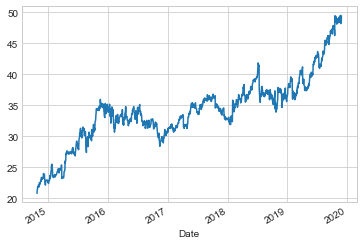

In [4]:
elisa['Closing price'].plot()

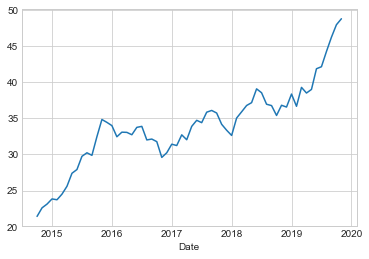

In [5]:
elisa['Closing price'].resample('M').mean().plot()

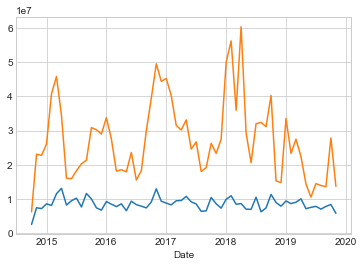

In [6]:
elisa['Total volume'].resample('M').sum().plot()
telia['Total volume'].resample('M').sum().plot()

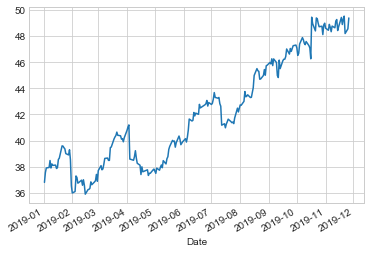

In [7]:
elisa['Closing price']['2019':].plot()

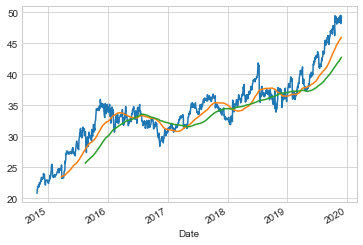

In [8]:
elisa['Closing price'].plot() 
elisa['Closing price'].rolling(100).mean().plot()
elisa['Closing price'].rolling(200).mean().plot()


In [9]:
elisa['Elisa%']=elisa['Closing price'].pct_change()
telia['Telia%']=telia['Closing price'].pct_change()
#tsiigailtii muutosprosenttei kurssis


In [10]:
# yhistetää telian ja elisan muutosprossa datasetit uudeks datasetiks
# huom concat defaulttaa ne datat yheks listaks jollon sil pitää kertoo eet ne pisteää vierekkäi, 
# axis=0 jono, axis=1 on vierekkäi

muutokset=pd.concat([elisa['Elisa%'], telia['Telia%']], axis=1)
muutokset.head()

,Elisa%,Telia%
Date,,
2014-10-27,NaN,NaN
2014-10-28,0.026442,0.021989
2014-10-29,0.003279,0.016838
2014-10-30,0.007937,0.004600
2014-10-31,0.014358,-0.004579


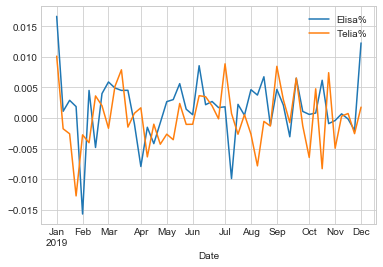

In [11]:
muutokset['2019':].resample('W').mean().plot()

In [12]:
muutokset.describe()
# btw muutokset.style.format('{:.0f}')

,Elisa%,Telia%
count,1278.000000,1278.000000
mean,0.000774,-0.000137
std,0.013910,0.012993
min,-0.092226,-0.079728
25%,-0.005976,-0.006884
50%,0.000866,-0.000489
75%,0.007699,0.007228
max,0.068757,0.083107


In [13]:
# elisan muutokset yli 5% tai altgr pysty | TAI, telian
muutokset[(abs(muutokset['Elisa%'])>0.05)|
          (abs(muutokset['Telia%'])>0.05)]

,Elisa%,Telia%
Date,,
2015-03-27,-0.075697,-0.012712
2015-04-09,0.011499,-0.066554
2015-04-16,0.055984,0.006346
2015-08-24,-0.055172,-0.058611
2015-08-25,0.065693,0.047335
2015-09-03,0.057869,0.032323
2015-09-25,0.061796,0.025510
2016-01-22,0.051540,0.037919
2016-04-01,-0.052092,-0.009645


In [14]:
# huom funktio() mutta ominaisuus ei() eli ei weekdayhy hehe

muutokset['Weekday']=muutokset.index.weekday
muutokset.groupby('Weekday')['Elisa%'].describe()

,count,mean,std,min,25%,50%,75%,max
Weekday,,,,,,,,
0,254.0,0.001466,0.013028,-0.055172,-0.004571,0.001003,0.007644,0.057805
1,260.0,0.000673,0.012648,-0.036921,-0.007346,0.000315,0.007232,0.065693
2,259.0,0.000663,0.012319,-0.053899,-0.005080,0.000338,0.007498,0.058061
3,255.0,0.000887,0.015322,-0.074751,-0.006554,0.001081,0.008295,0.068757
4,250.0,0.000174,0.015995,-0.092226,-0.006363,0.001174,0.007727,0.061796


In [15]:
muutokset.corr()

,Elisa%,Telia%,Weekday
Elisa%,1.000000,0.461965,-0.023860
Telia%,0.461965,1.000000,0.006748
Weekday,-0.023860,0.006748,1.000000


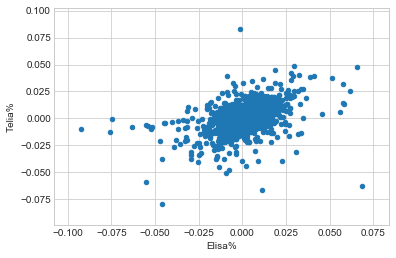

In [16]:
muutokset.plot.scatter(x='Elisa%', y='Telia%')

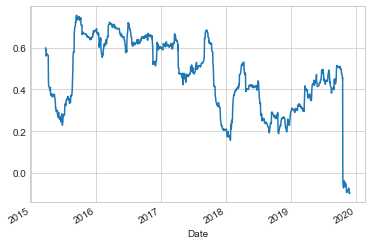

In [17]:
# basically katotaan rolling korrelaatio elisa vs telia ajan yli
muutokset['Elisa%'].rolling(100).corr(muutokset['Telia%']).plot()

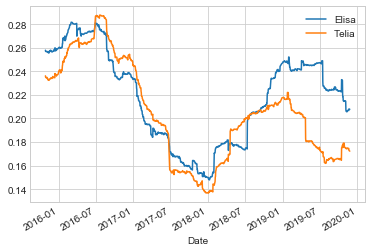

In [21]:
# huom 252 on vuoden kaupantekopäivät about
# huom skaaltaan vuositasolle keskihajonta kerrotaaan kaupantekopäivinen neliöjuurella
(muutokset['Elisa%'].rolling(252).std()*(252**0.5)).plot(label='Elisa',
                                                       legend=True)
(muutokset['Telia%'].rolling(252).std()*(252**0.5)).plot(label='Telia',
                                                      legend=True)

In [ ]:
fig, ax=plt.subplots(figsize=(10,6))

ax.set_ylabel('Elisa', color='C0', fontsize=14)
ax.plot(elisa['Closing price'], color='C0')
ax.set_ylim(15,45)

ax_T=ax.twinx()
ax_T.set_ylabel('Telia', color='C1', fontsize=14)
ax_T.plot(telia['Closing price'], color='C1')
ax_T.set_ylim(3,6)